#  分类模型评估

## 六, 分类模型评估

在完成模型训练之后，需要对模型的效果进行评估，根据评估结果继续调整模型的参数, 特征或者算法，以达到满意的结果

### 1, 混淆矩阵

将 真正例(TP), 假正例(FP), 真负例(TN), 假负例(FN) 统计于一个方阵中, 观察比较, 评价模型好坏, 矩阵如下:

![](/images/mathematical-statistics/hxjz.png)

混淆矩阵统计数量, 评价不直观也有限, 基于混淆矩阵又延伸出 正确率, 精准率, 召回率, F1(调和平均值), ROC曲线和AUC等

### 2, 评估指标分析

**正确率:**

$$\text { 正确率 }=\frac{T P+T N}{T P+T N+F P+F N}$$

正确率, 表示总体(包括正负)预测正确的比率, 在模型对正例和负例的预测准确度差异较大时, 难以评价模型的好坏, 例如正例较多, 负例较少,
正例全部预测对了, 负例只预测对几个, 正确率却可能较高

**精准率:**

$$\text { 精准率 }=\frac{T P}{T P+F P}$$

精准率, 表示所有预测为正例的结果中 预测正确的正例 的占比, 精准率越高, 说明正例预测正确概率越高, 因此精准率更关注”一击必中”,
比如通过预测找出上涨的概率很高的一支股票

**召回率:**

$$\text { 召回率 }=\frac{T P}{T P+F N}$$

召回率, 表示所有真实的正例中, 预测正确的正例 的占比, 召回率越高, 说明正例被”召回”的越多, 因此召回率更关注”宁错一千, 不放一个”,
例如通过预测尽可能将新冠肺炎患者全部隔离观察

**调和平均值 F1** :

$$F 1=\frac{2 * \text {精准率} * \text {召回率}}{\text {精准率}+\text {召回率}}$$

F1 将综合了精准率和召回率, F1越高, 说明模型预测效果越好, F1 能够直接评估模型的好坏

**ROC曲线:**

ROC (Receiver Operating Characteristic) 曲线, 用图像来描述分类模型的性能好坏. 图像纵轴为 真 正例率(TPR),
横轴为 假 正例率(FPR):

$$\begin{array}{l}  
T P R=\text { 召回率 }=\frac{T P}{T P+F N} \  
F P R=\frac{F P}{F P+T N}  
\end{array}$$

上述两式通过取分类模型的不同阈值, 从而计算出不同的值, 绘制出曲线, 曲线必过 (0,0) 和 (1, 1) 两个点, TPR 增长得越快,
曲线越往上凸, 模型的分类性能就越好. 如果 ROC 曲线为对角线, 可将模型理解为随机猜测; 如果 ROC 曲线在 0 点 真 正例率就达到了 1,
此时模型最完美

**AUC:**

AUC (Area Under the Curve), 是 ROC 曲线下面的面积, 因为有时通过 ROC 曲线看不出哪个分类模型性能好, 而 AUC
比较数值就不存在这样的问题

以鸢尾花数据集做如下练习:

In [1]:
import numpy as np  
from sklearn.datasets import load_iris  
from sklearn.linear_model import LogisticRegression   
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import warnings  

plt.rcParams["font.family"] = "SimHei"  
plt.rcParams["axes.unicode_minus"] = False   
plt.rcParams["font.size"] = 12   
warnings.filterwarnings("ignore")  

iris = load_iris()  
x, y = iris.data, iris.target  
x = x[y!=0, 2:]  
y = y[y!=0]  
x_train, x_test, y_train, y_test = train_test_split(x, y,  
                        test_size=0.25, random_state=2)  
lr = LogisticRegression()  
lr.fit(x_train, y_train)  
y_hat = lr.predict(x_test)  

# 传入真实值与预测值, 创建混淆矩阵  
matrix = confusion_matrix(y_true=y_test, y_pred=y_hat)  
print(matrix)  
y_hat[y_hat==1].sum()  

[[15  1]
 [ 1  8]]


16

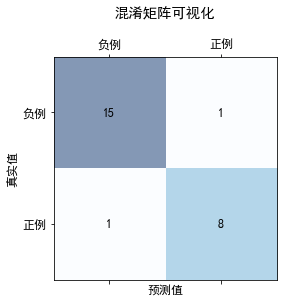

In [2]:
# 将混淆矩阵可视化  
mat = plt.matshow(matrix, cmap=plt.cm.Blues, alpha=0.5)  
label = ["负例", "正例"]  

# 获取当前的绘图对象  
ax = plt.gca()  

# 设置属性, 设类别 1 为负例  
ax.set(  
    xticks=np.arange(matrix.shape[1]),   
    yticks=np.arange(matrix.shape[0]),  
    xticklabels=label,   
    yticklabels=label,   
    title="混淆矩阵可视化\n",   
    ylabel="真实值",   
    xlabel="预测值")  

# 设置统计值的位置  
for i in range(matrix.shape[0]):  
    for j in range(matrix.shape[1]):  
        plt.text(x=j, y=i, s=matrix[i, j], va="center", ha="center")   

plt.show()  

In [3]:
# 计算各个评估指标  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  

print("正确率：", accuracy_score(y_test, y_hat))  

# 默认以 1 为正例, 我们将 2 设为正例  
print("精准率：", precision_score(y_test, y_hat, pos_label=2))  
print("召回率：", recall_score(y_test, y_hat, pos_label=2))  
print("F1：", f1_score(y_test, y_hat, pos_label=2))  

# 也可以用逻辑回归模型对象的score方法计算正确率   
print("score方法计算正确率：", lr.score(x_test, y_test))  

正确率： 0.92
精准率： 0.8888888888888888
召回率： 0.8888888888888888
F1： 0.8888888888888888
score方法计算正确率： 0.92


In [4]:
# 还可以用 classification_report 方法直接计算各个指标  
from sklearn.metrics import classification_report  
print(classification_report(y_true=y_test, y_pred=y_hat))  

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



In [5]:
# 绘制 ROC曲线 和计算 AUC  
from sklearn.metrics import roc_curve, auc, roc_auc_score  

iris = load_iris()  
x, y = iris.data, iris.target  
x = x[y!=0, 2:]  
y = y[y!=0]  
x_train, x_test, y_train, y_test = train_test_split(x, y,  
                            test_size=0.25, random_state=2)  

# 设置模型参数(有默认值可以不设), 并进行训练  
# 不同的参数训练结果不一样, 需要注意参数之间关系  
lr = LogisticRegression(multi_class="ovr", solver="liblinear")  
# lr = LogisticRegression(multi_class="multinomial")  
lr.fit(x_train, y_train)  

# 获取样本的概率  
probo = lr.predict_proba(x_test)  
print('类别 2 的概率:', probo[:, 1][:5])  

# 将概率值传入 roc_curve 方法, 从概率中选择若干个值作为阈值  
# 同时根据阈值判定正负例, 返回 fpr, tpr 和 阈值 thresholds  
fpr, tpr, thresholds = roc_curve(y_true=y_test,  
                       y_score=probo[:, 1], pos_label=2)  

# 阈值中的第一个值是第二个值 +1 得到, 为了让让曲线过 0 点  
print('阈值:', thresholds)  

# 计算 AUC   
print('用auc计算:', auc(fpr, tpr))  
print('用roc_auc_score计算:', roc_auc_score(y_true=y_test,  
                                    y_score=probo[:, 1]))  

类别 2 的概率: [0.4663913  0.28570842 0.60050037 0.3758227  0.48450719]
阈值: [1.69092453 0.69092453 0.60050037 0.54308778 0.50384451 0.49358343
 0.48450719 0.47242245 0.4663913  0.42043757 0.39590375 0.39413886
 0.3843811  0.24698327]
用auc计算: 0.8819444444444444
用roc_auc_score计算: 0.8819444444444444


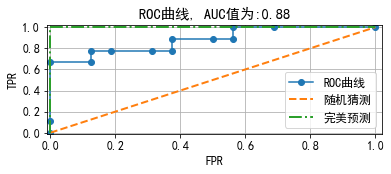

In [6]:
# 绘制 ROC 曲线  
plt.figure(figsize=(6, 2))  
plt.plot(fpr, tpr, marker="o", label="ROC曲线")  
plt.plot([0,1], [0,1], lw=2, ls="--", label="随机猜测")   
plt.plot([0, 0, 1], [0, 1, 1], lw=2, ls="-.", label="完美预测")   
plt.xlim(-0.01, 1.02)  
plt.ylim(-0.01, 1.02)  
plt.xticks(np.arange(0, 1.1, 0.2))  
plt.yticks(np.arange(0, 1.1, 0.2))  
plt.xlabel("FPR")  
plt.ylabel("TPR")  
plt.grid()  
plt.title(f"ROC曲线, AUC值为:{auc(fpr, tpr):.2f}")  
plt.legend()  
plt.show()  